In [1]:
%matplotlib inline
# %matplotlib notebook 

In [10]:
from netCDF4 import Dataset as NetCDFFile 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (9,9)
plt.rcParams['savefig.facecolor']='white'
import numpy as np
import gc
from dateutil import parser
from netCDF4 import date2index, num2date
from mpl_toolkits.basemap import Basemap, interp

In [28]:
nc = NetCDFFile('/home/neeraj/Cumulus-Parameterization-IITM/data/sascnvn_output/ecmwf_sascnvn_Aug2017.nc')
trmm = NetCDFFile('/home/neeraj/Cumulus-Parameterization-IITM/data/TRMM_MumbaiFloods_29Aug2017/trmm_25Aug_to_2Sept.nc')

In [29]:
# combine multiple TRMM files into one!
# https://stackoverflow.com/questions/23957350/netcdf-time-dimension-missing-cdo
# check the global attribute of trmm_concatenated.nc for the history

nc.variables['rn'].shape

(124, 36, 71)

In [30]:
lat = nc.variables['latitude'][:]
lon = nc.variables['longitude'][:]
time = nc.variables['time']
rn = nc.variables['rn'][:]

lat_trmm = trmm.variables['lat'][:]
lon_trmm = trmm.variables['lon'][:]
trmm_ppt = trmm.variables['precipitation'][:]

# scale ppt (in mm/hr) to get mm/day
trmm_ppt = np.multiply(trmm_ppt, 24)

In [21]:
time

<type 'netCDF4._netCDF4.Variable'>
float32 time(time)
    units: hours since 1900-01-01 00:00:0.0
    calendar: gregorian
unlimited dimensions: time
current shape = (124,)
filling off

In [31]:
map = Basemap(projection='merc',llcrnrlon=40.,llcrnrlat=0.,urcrnrlon=110.,urcrnrlat=35.,resolution='i')

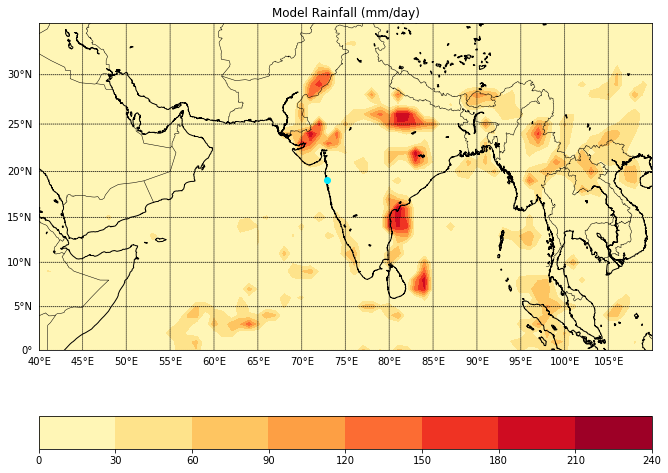

In [38]:
fig, axes = plt.subplots()

parallels = np.arange(0,35,5) # make latitude lines ever 5 degrees from 30N-50N
meridians = np.arange(40,110,5) # make longitude lines every 5 degrees from 95W to 70W
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

map.drawcoastlines()
map.drawstates()
map.drawcountries()

lons,lats= np.meshgrid(lon,lat) # for this dataset, longitude is 0 through 360, so you need to subtract 180 to properly display on map
x,y = map(lons,lats)

days = ["2017-08-28", "2017-08-28 06", "2017-08-28 12", "2017-08-28 18", "2017-08-29", "2017-08-29 06", "2017-08-29 12", "2017-08-29 18"]
time_index = date2index(parser.parse(days[7]), time)

# https://matplotlib.org/tutorials/colors/colormaps.html?highlight=color%20maps
rain = map.contourf(x,y,rn[time_index,:,:], cmap=plt.get_cmap('YlOrRd'))
cb = map.colorbar(rain,"bottom", size="10%", pad="20%" )
mumbai_lon, mumbai_lat = 72.8777, 19.0760
xpt, ypt = map(mumbai_lon, mumbai_lat)
map.plot(xpt,ypt,marker = 'o', color='#00e9ff', zorder=100)
# for tick in axes.get_xticklabels():
#     tick.set_rotation(45)
plt.title('Model Rainfall (mm/day)')
plt.tight_layout()
plt.show()
# plt.savefig('regridded_sascnvn_spatial.pdf', bbox_inches='tight')

In [ ]:
map_trmm = Basemap(projection='merc',llcrnrlon=40.,llcrnrlat=0.,urcrnrlon=110.,urcrnrlat=35.,resolution='i')

In [ ]:
# colormap assumes a linear boundaries, if non-linear boundaries then normalize the colors to suit the varying gaps between consecutive boundaries
import matplotlib.colors as colors
bounds = np.array([0, 5, 10, 20, 40, 80, 120, 200, 400, 600])
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=250)

fig, axes = plt.subplots()

parallels = np.arange(10,30,5) # make latitude lines ever 5 degrees from 30N-50N
meridians = np.arange(60,85,5) # make longitude lines every 5 degrees from 95W to 70W
map_trmm.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
map_trmm.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

map_trmm.drawcoastlines()
map_trmm.drawstates()
map_trmm.drawcountries()

lons_trmm, lats_trmm = np.meshgrid(lon_trmm,lat_trmm)
x2,y2 = map_trmm(lons_trmm,lats_trmm)
# cmap = LinearSegmentedColormap.from_list('mycmap', [(0 / vmax, 'blue'),
#                                                     (1 / vmax, 'white'),
#                                                     (3 / vmax, 'red')]
#                                         )
trmm_rain = map_trmm.contourf(x2,y2, trmm_ppt[-3,:,:],bounds,norm=norm,cmap=plt.get_cmap('YlOrRd'))
cb2 = map_trmm.colorbar(trmm_rain,"bottom", size="10%", pad="10%")
mumbai_lon, mumbai_lat = 72.8777, 19.0760
xpt, ypt = map_trmm(mumbai_lon, mumbai_lat)
map_trmm.plot(xpt,ypt,marker = 'o', color='#00e9ff', zorder=100)
plt.xticks(rotation=90)
plt.title('Observed Rainfall (mm/day)')
# plt.colorbar()
plt.show()

In [6]:
# mumbai grid
map2_trmm = Basemap(projection='merc',llcrnrlon=70.,llcrnrlat=17.,urcrnrlon=75.,urcrnrlat=22.,resolution='i')

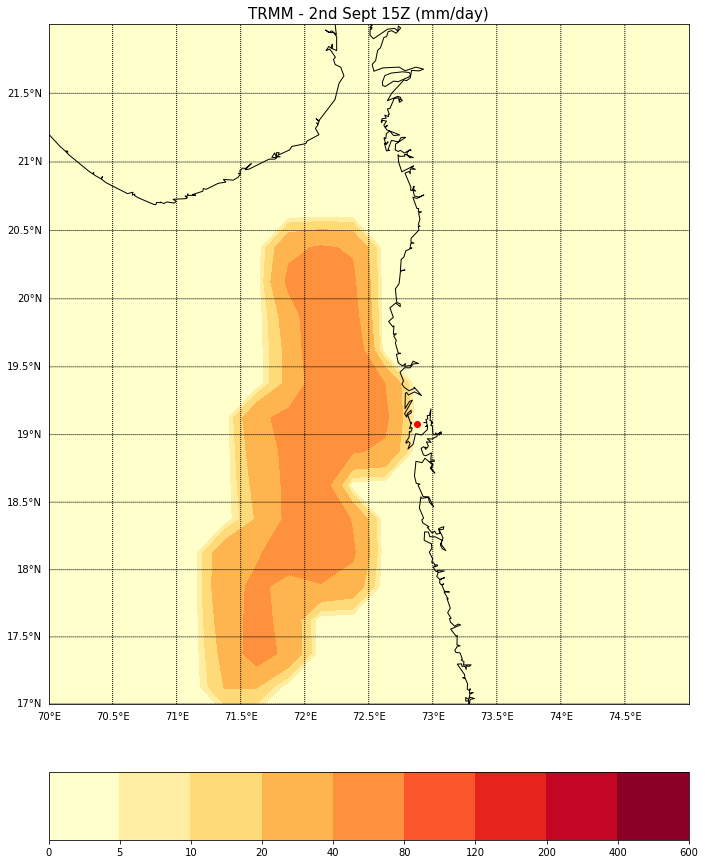

In [12]:
import matplotlib.colors as colors
bounds = np.array([0, 5, 10, 20, 40, 80, 120, 200, 400, 600])
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=250)

fig, axes = plt.subplots()

parallels = np.arange(17,22,0.5) # make latitude lines ever 5 degrees from 30N-50N
meridians = np.arange(70,75,0.5) # make longitude lines every 5 degrees from 95W to 70W
map2_trmm.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
map2_trmm.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

map2_trmm.drawcoastlines()
map2_trmm.drawstates()
map2_trmm.drawcountries()

lons_trmm, lats_trmm = np.meshgrid(lon_trmm,lat_trmm)
x2,y2 = map2_trmm(lons_trmm,lats_trmm)
trmm_rain = map2_trmm.contourf(x2,y2, trmm_ppt[-3,:,:],bounds,norm=norm,cmap=plt.get_cmap('YlOrRd'))
cb3 = map2_trmm.colorbar(trmm_rain,"bottom", size="10%", pad="10%")
mumbai_lon, mumbai_lat = 72.8777, 19.0760
plt.title('TRMM - 2nd Sept 15Z (mm/day)', fontsize=15)
xpt, ypt = map2_trmm(mumbai_lon, mumbai_lat)
map2_trmm.plot(xpt,ypt, marker = 'o', color='red', zorder=100)

plt.xticks(rotation=90)
# plt.show()
plt.savefig('trmm_2ndsept15Z_spatial.pdf', bbox_inches='tight')

In [44]:
gc.collect()

24

 closest gridpoint to Mumbai:  73.0 19.0


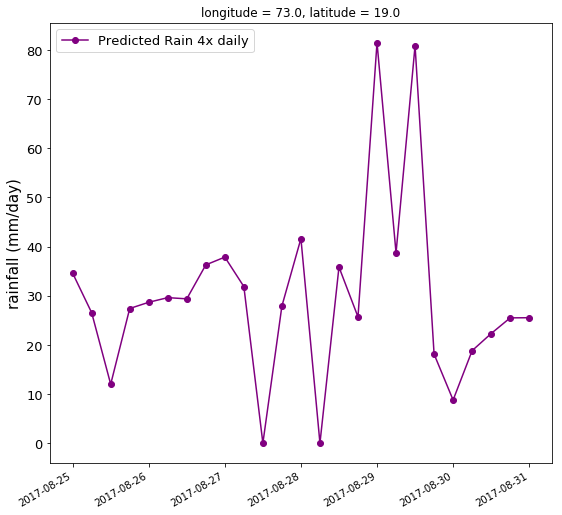

In [43]:
import xarray as xr

ds = xr.open_dataset('/home/neeraj/Cumulus-Parameterization-IITM/data/sascnvn_output/ecmwf_sascnvn_Aug2017.nc')
ds = ds.sel(time=slice('2017-08-25-00Z', '2017-08-31-00Z'))
mumbai_lon, mumbai_lat = 72.8777, 19.0760
# extract a dataset closeste to specified point
# http://xarray.pydata.org/en/stable/indexing.html
dsloc = ds.sel(longitude=mumbai_lon, latitude=mumbai_lat, method='nearest')
# data  = ds.sel(lat=slice(40.1,42.3), lon=slice(1.02,1.84))
print "closest gridpoint to Mumbai: ", dsloc.longitude.data, dsloc.latitude.data


fig, axes = plt.subplots()
# fig.figsize=(15,25)
# fig.autofmt_xdate()

# plt.subplot(2,1,1)
# select a variable to plot
dsloc['rn'].plot.line(color='purple', marker='o', label='Predicted Rain 4x daily')
plt.ylabel('rainfall (mm/day)', fontsize=15)
plt.xlabel("")
plt.yticks(fontsize=13)
labels = [
    "2017-08-25-0Z", "2017-08-25-06Z", "2017-08-25-12Z", "2017-08-25-18Z", 
"2017-08-26-0Z", "2017-08-26-06Z", "2017-08-26-12Z", "2017-08-26-18Z", 
"2017-08-27-0Z", "2017-08-27-06Z", "2017-08-27-12Z", "2017-08-27-18Z", 
"2017-08-28-0Z", "2017-08-28-06Z", "2017-08-28-12Z", "2017-08-28-18Z", 
"2017-08-29-0Z", "2017-08-29-06Z", "2017-08-29-12Z", "2017-08-29-18Z", 
"2017-08-30-0Z", "2017-08-30-06Z", "2017-08-30-12Z", "2017-08-30-18Z"
# "2017-08-31-0Z", "2017-08-31-06Z", "2017-08-31-12Z", "2017-08-31-18Z", 
# "2017-09-01-0Z", "2017-09-01-06Z", "2017-09-01-12Z", "2017-09-01-18Z", 
# "2017-09-02-0Z", "2017-09-02-06Z", "2017-09-02-12Z", "2017-09-02-18Z", 
# "2017-09-03-0Z", "2017-09-03-06Z", "2017-09-03-12Z", "2017-09-03-18Z", 
# "2017-09-04-0Z", "2017-09-04-06Z", "2017-09-04-12Z", "2017-09-04-18Z", 
# "2017-09-05-0Z"
]
# plt.xticks(range(45), labels, rotation=90, fontsize=10)
# plt.axvline(x='2017-09-02-15Z', ymin=0, ymax=0.64, linewidth=1, linestyle='--')
# plt.axhline(y=17.7, xmin=0, xmax=0.615, linewidth=1, linestyle='--')
# plt.text('2017-09-02-16Z', 17.7, '17.7 at 2ndSept 15Z', fontsize=12)
plt.legend(loc='best', fontsize=13)
fig.autofmt_xdate()
plt.show()

# plt.savefig('sascnvn_2ndsept_timeseries.pdf', bbox_inches='tight')

In [ ]:
print ds.variables['rn']
# print dsloc.lat.data

In [6]:
import xarray as xr

# combine TRMM files and plot timeseries of observed rainfall
ds = xr.open_dataset('/home/neeraj/Cumulus-Parameterization-IITM/data/TRMM_MumbaiFloods_29Aug2017/trmm_25Aug_to_2Sept.nc')
mumbai_lon, mumbai_lat = 72.8777, 19.0760

ds = ds*24

closest TRMM gridpoint to Mumbai:  72.875 19.125


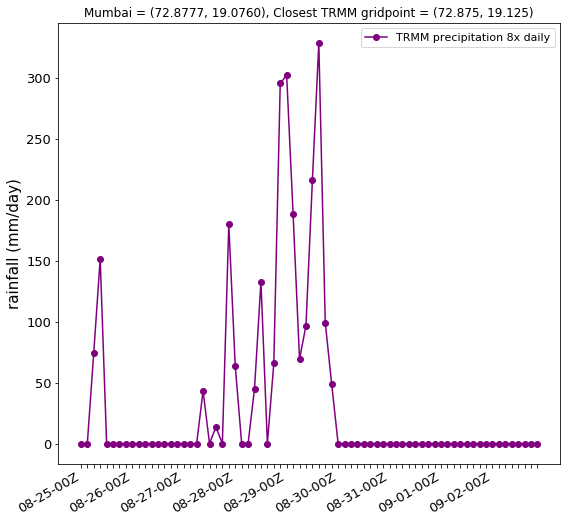

In [7]:

# extract a dataset closeste to specified point
dsloc = ds.sel(lon=mumbai_lon, lat=mumbai_lat, method='nearest')
print "closest TRMM gridpoint to Mumbai: ", dsloc.lon.data, dsloc.lat.data

fig, axes = plt.subplots()
plt.figsize=(35,15)
# plt.subplot(2,1,2)
# select a variable to plot
dsloc['precipitation'].plot.line(color='purple', marker='o', label="TRMM precipitation 8x daily")
plt.ylabel('rainfall (mm/day)', fontsize=15)
plt.xlabel("")
# plt.title('Observed Rainfall in Mumbai region')
plt.yticks(fontsize=13)
labels = ["08-25-00Z", "08-25-03Z", "08-25-06Z", "08-25-09Z", "08-25-12Z", 
          "08-25-15Z", "08-25-18Z", "08-25-21Z", "08-26-00Z", "08-26-03Z", 
          "08-26-06Z", "08-26-09Z", "08-26-12Z", "08-26-15Z", "08-26-18Z", 
          "08-26-21Z", "08-27-00Z", "08-27-03Z", "08-27-06Z", "08-27-09Z", 
          "08-27-12Z", "08-27-15Z", "08-27-18Z", "08-27-21Z", "08-28-00Z", 
          "08-28-03Z", "08-28-06Z", "08-28-09Z", "08-28-12Z", "08-28-15Z", 
          "08-28-18Z", "08-28-21Z", "08-29-00Z", "08-29-03Z", "08-29-06Z", 
          "08-29-09Z", "08-29-12Z", "08-29-15Z", "08-29-18Z", "08-29-21Z", 
          "08-30-00Z", "08-30-03Z", "08-30-06Z", "08-30-09Z", "08-30-12Z", 
          "08-30-15Z", "08-30-18Z", "08-30-21Z", "08-31-00Z", "08-31-03Z", 
          "08-31-06Z", "08-31-09Z", "08-31-12Z", "08-31-15Z", "08-31-18Z", 
          "08-31-21Z", "09-01-00Z", "09-01-03Z", "09-01-06Z", "09-01-09Z", 
          "09-01-12Z", "09-01-15Z", "09-01-18Z", "09-01-21Z", "09-02-00Z", 
          "09-02-03Z", "09-02-06Z", "09-02-09Z", "09-02-12Z", "09-02-15Z", 
          "09-02-18Z", "09-02-21Z"]
cleaner_labels=[]
for i in range(len(labels)):
    if i%8 == 0:
        cleaner_labels.append(labels[i])
    else:
        cleaner_labels.append("")

plt.xticks(range(72), cleaner_labels, rotation=90, fontsize=13)
plt.title("Mumbai = (72.8777, 19.0760), Closest TRMM gridpoint = (72.875, 19.125)", fontsize=12)
plt.legend(loc='best', fontsize=11)
fig.autofmt_xdate()
plt.show()
# plt.savefig('trmm_rainfall_timeseries.pdf', bbox_inches='tight')

In [13]:
gc.collect()

8252

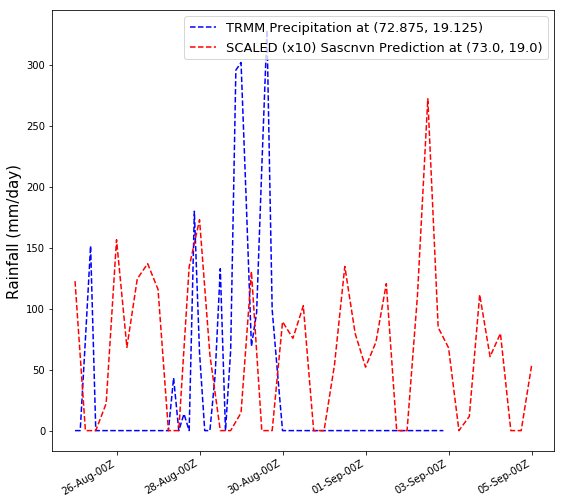

In [11]:
# overlapping timeseries
from matplotlib.dates import date2num , DateFormatter
import datetime as dt
from dateutil import parser

sascnvn_ds = xr.open_dataset('/home/neeraj/Cumulus-Parameterization-IITM/data/sascnvn_output/regridded_sascnvn_MumbaiFloods.nc')
sascnvn_dsloc = sascnvn_ds.sel(lon=mumbai_lon, lat=mumbai_lat, method='nearest')

trmm_ds = xr.open_dataset('/home/neeraj/Cumulus-Parameterization-IITM/data/TRMM_MumbaiFloods_29Aug2017/trmm_25Aug_to_2Sept.nc')
trmm_dsloc = trmm_ds.sel(lon=mumbai_lon, lat=mumbai_lat, method='nearest')

# different times from the same timespan
# 3 hourly timestep
trmm_labels = ["2017-08-25-00Z", "2017-08-25-03Z", "2017-08-25-06Z", "2017-08-25-09Z", 
"2017-08-25-12Z", "2017-08-25-15Z", "2017-08-25-18Z", "2017-08-25-21Z",
"2017-08-26-00Z", "2017-08-26-03Z", "2017-08-26-06Z", "2017-08-26-09Z",
"2017-08-26-12Z", "2017-08-26-15Z", "2017-08-26-18Z", "2017-08-26-21Z", 
"2017-08-27-00Z", "2017-08-27-03Z", "2017-08-27-06Z", "2017-08-27-09Z", 
"2017-08-27-12Z", "2017-08-27-15Z", "2017-08-27-18Z", "2017-08-27-21Z", 
"2017-08-28-00Z", "2017-08-28-03Z", "2017-08-28-06Z", "2017-08-28-09Z", 
"2017-08-28-12Z", "2017-08-28-15Z", "2017-08-28-18Z", "2017-08-28-21Z", 
"2017-08-29-00Z", "2017-08-29-03Z", "2017-08-29-06Z", "2017-08-29-09Z", 
"2017-08-29-12Z", "2017-08-29-15Z", "2017-08-29-18Z", "2017-08-29-21Z", 
"2017-08-30-00Z", "2017-08-30-03Z", "2017-08-30-06Z", "2017-08-30-09Z", 
"2017-08-30-12Z", "2017-08-30-15Z", "2017-08-30-18Z", "2017-08-30-21Z", 
"2017-08-31-00Z", "2017-08-31-03Z", "2017-08-31-06Z", "2017-08-31-09Z", 
"2017-08-31-12Z", "2017-08-31-15Z", "2017-08-31-18Z", "2017-08-31-21Z", 
"2017-09-01-00Z", "2017-09-01-03Z", "2017-09-01-06Z", "2017-09-01-09Z", 
"2017-09-01-12Z", "2017-09-01-15Z", "2017-09-01-18Z", "2017-09-01-21Z", 
"2017-09-02-00Z", "2017-09-02-03Z", "2017-09-02-06Z", "2017-09-02-09Z", 
"2017-09-02-12Z", "2017-09-02-15Z", "2017-09-02-18Z", "2017-09-02-21Z"]
trmm_dates = []
for lb in trmm_labels: 
    trmm_dates.append(date2num(parser.parse(lb)))
    
# 6 hourly timestep
sascnvn_labels=["2017-08-25-00Z", "2017-08-25-06Z", "2017-08-25-12Z", "2017-08-25-18Z", 
"2017-08-26-00Z", "2017-08-26-06Z", "2017-08-26-12Z", "2017-08-26-18Z", 
"2017-08-27-00Z", "2017-08-27-06Z", "2017-08-27-12Z", "2017-08-27-18Z", 
"2017-08-28-00Z", "2017-08-28-06Z", "2017-08-28-12Z", "2017-08-28-18Z", 
"2017-08-29-00Z", "2017-08-29-06Z", "2017-08-29-12Z", "2017-08-29-18Z", 
"2017-08-30-00Z", "2017-08-30-06Z", "2017-08-30-12Z", "2017-08-30-18Z", 
"2017-08-31-00Z", "2017-08-31-06Z", "2017-08-31-12Z", "2017-08-31-18Z", 
"2017-09-01-00Z", "2017-09-01-06Z", "2017-09-01-12Z", "2017-09-01-18Z", 
"2017-09-02-00Z", "2017-09-02-06Z", "2017-09-02-12Z", "2017-09-02-18Z", 
"2017-09-03-00Z", "2017-09-03-06Z", "2017-09-03-12Z", "2017-09-03-18Z", 
"2017-09-04-00Z", "2017-09-04-06Z", "2017-09-04-12Z", "2017-09-04-18Z", 
"2017-09-05-00Z"]
sascnvn_dates = []
for lb in sascnvn_labels: 
    sascnvn_dates.append(date2num(parser.parse(lb)))

fig, ax = plt.subplots()
ax.plot_date(trmm_dates, trmm_dsloc['precipitation']*24, 'b--', label="TRMM Precipitation at (72.875, 19.125)")
ax.plot_date(sascnvn_dates, sascnvn_dsloc['rn']*10, 'r--', label="SCALED (x10) Sascnvn Prediction at (73.0, 19.0)")
ax.xaxis.set_major_formatter(DateFormatter('%d-%h-%HZ'))
fig.autofmt_xdate()
plt.ylabel('Rainfall (mm/day)', fontsize=15)
plt.legend(loc="upper right", fontsize=13, fancybox=True)
# plt.show()
plt.savefig('combined_timeseries_scaled.pdf', bbox_inches='tight')

In [ ]:
from dateutil import parser
labels=["2017-08-25-00Z", "2017-08-25-06Z", "2017-08-25-12Z", "2017-08-25-18Z", 
"2017-08-26-00Z", "2017-08-26-06Z", "2017-08-26-12Z", "2017-08-26-18Z", 
"2017-08-27-00Z", "2017-08-27-06Z", "2017-08-27-12Z", "2017-08-27-18Z", 
"2017-08-28-00Z", "2017-08-28-06Z", "2017-08-28-12Z", "2017-08-28-18Z", 
"2017-08-29-00Z", "2017-08-29-06Z", "2017-08-29-12Z", "2017-08-29-18Z", 
"2017-08-30-00Z", "2017-08-30-06Z", "2017-08-30-12Z", "2017-08-30-18Z", 
"2017-08-31-00Z", "2017-08-31-06Z", "2017-08-31-12Z", "2017-08-31-18Z", 
"2017-09-01-00Z", "2017-09-01-06Z", "2017-09-01-12Z", "2017-09-01-18Z", 
"2017-09-02-00Z", "2017-09-02-06Z", "2017-09-02-12Z", "2017-09-02-18Z", 
"2017-09-03-00Z", "2017-09-03-06Z", "2017-09-03-12Z", "2017-09-03-18Z", 
"2017-09-04-00Z", "2017-09-04-06Z", "2017-09-04-12Z", "2017-09-04-18Z", 
"2017-09-05-00Z"]

TA = []
for lb in labels: 
    dates.append(date2num(parser.parse(lb)))
    


In [45]:
gc.collect()

0

# panel plot 8 by 2. model output vs observations. 28th and 29th August, 4x daily.

In [13]:
map = Basemap(projection='merc',llcrnrlon=40.,llcrnrlat=0.,urcrnrlon=110.,urcrnrlat=35.,resolution='i')
map_trmm = Basemap(projection='merc',llcrnrlon=40.,llcrnrlat=0.,urcrnrlon=110.,urcrnrlat=35.,resolution='i')

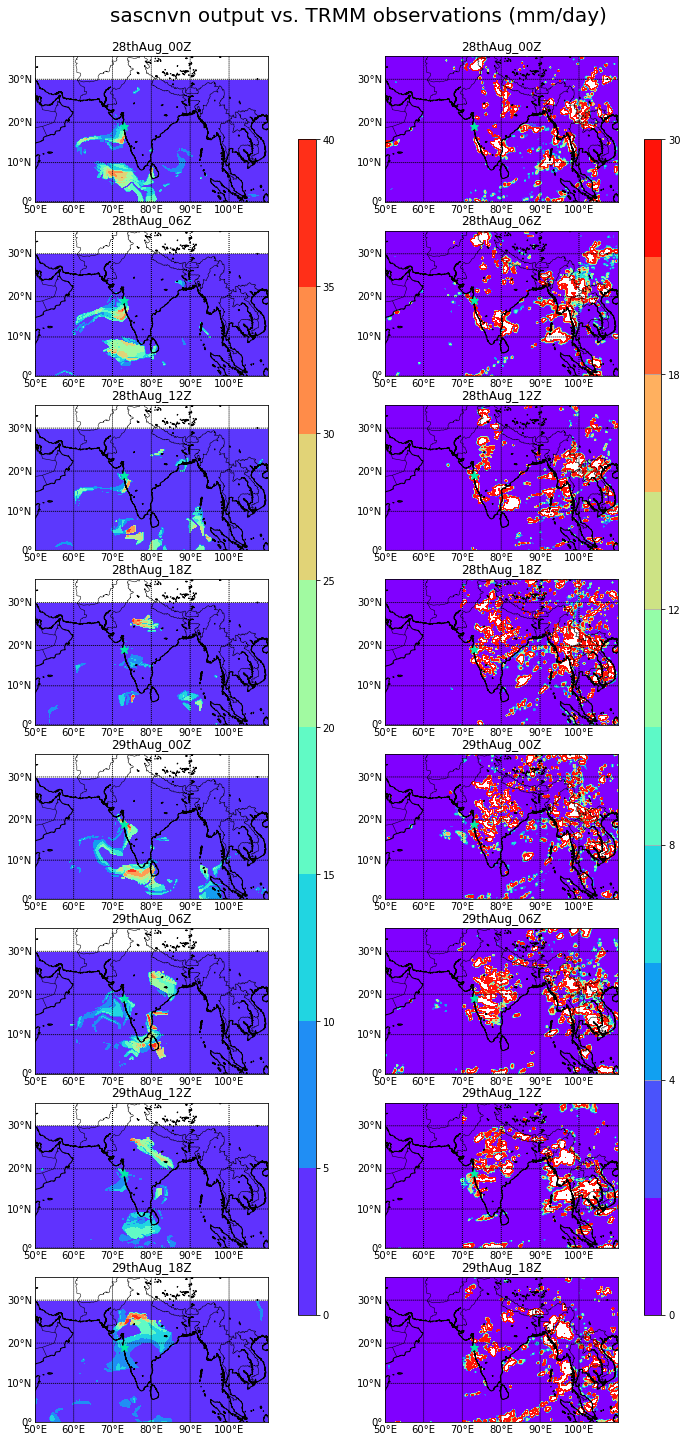

In [20]:
# colormap assumes linearly increasing boundaries
# if non-linear boundaries then normalize the colors to suit the varying gaps
import matplotlib.colors as colors
bounds = np.array([0, 2, 4, 6, 8, 10, 12, 15, 18, 20, 30])
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=250)

fig, axes = plt.subplots(figsize=(12,23))
# fig.subplots_adjust(wspace=0, hspace=0)
# axes.set_aspect("auto")

parallels = np.arange(0,35,10) # make latitude lines ever 5 degrees from 30N-50N
meridians = np.arange(40,110,10) # make longitude lines every 5 degrees from 95W to 70W

mumbai_lon, mumbai_lat = 72.8777, 19.0760
xpt, ypt = map(mumbai_lon, mumbai_lat)

lons,lats= np.meshgrid(lon,lat) # for this dataset, longitude is 0 through 360, so you need to subtract 180 to properly display on map
x,y = map(lons,lats)

lons_trmm, lats_trmm = np.meshgrid(lon_trmm,lat_trmm)
x2,y2 = map_trmm(lons_trmm,lats_trmm)

plt.subplot(8,2,1)
plt.title('28thAug_00Z')
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)
map.drawcoastlines()
map.drawstates()
map.drawcountries()
rain = map.contourf(x,y,rn[13,:,:], cmap=plt.get_cmap('rainbow'))
map.plot(xpt,ypt,marker = '*', markersize=9, color='#00eda6', zorder=100)

plt.subplot(8,2,2)
plt.title('28thAug_00Z')
map_trmm.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
map_trmm.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)
map_trmm.drawcoastlines()
map_trmm.drawstates()
map_trmm.drawcountries()
trmm_rain = map_trmm.contourf(x2,y2, trmm_ppt[0,:,:],bounds,norm=norm, cmap=plt.get_cmap('rainbow'))
map_trmm.plot(xpt,ypt,marker = '*', markersize=9, color='#00eda6', zorder=100)

plt.subplot(8,2,3)
plt.title('28thAug_06Z')
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)
map.drawcoastlines()
map.drawstates()
map.drawcountries()
rain = map.contourf(x,y,rn[14,:,:], cmap=plt.get_cmap('rainbow'))
map.plot(xpt,ypt,marker = '*', markersize=9, color='#00eda6', zorder=100)

plt.subplot(8,2,4)
plt.title('28thAug_06Z')
map_trmm.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
map_trmm.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)
map_trmm.drawcoastlines()
map_trmm.drawstates()
map_trmm.drawcountries()
trmm_rain = map_trmm.contourf(x2,y2, trmm_ppt[1,:,:],bounds,norm=norm, cmap=plt.get_cmap('rainbow'))
map_trmm.plot(xpt,ypt,marker = '*', markersize=9, color='#00eda6', zorder=100)

plt.subplot(8,2,5)
plt.title('28thAug_12Z')
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)
map.drawcoastlines()
map.drawstates()
map.drawcountries()
rain = map.contourf(x,y,rn[15,:,:], cmap=plt.get_cmap('rainbow'))
map.plot(xpt,ypt,marker = '*', markersize=9, color='#00eda6', zorder=100)


plt.subplot(8,2,6)
plt.title('28thAug_12Z')
map_trmm.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
map_trmm.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)
map_trmm.drawcoastlines()
map_trmm.drawstates()
map_trmm.drawcountries()
trmm_rain = map_trmm.contourf(x2,y2, trmm_ppt[2,:,:],bounds,norm=norm, cmap=plt.get_cmap('rainbow'))
map_trmm.plot(xpt,ypt,marker = '*', markersize=9, color='#00eda6', zorder=100)

plt.subplot(8,2,7)
plt.title('28thAug_18Z')
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)
map.drawcoastlines()
map.drawstates()
map.drawcountries()
rain = map.contourf(x,y,rn[16,:,:], cmap=plt.get_cmap('rainbow'))
map.plot(xpt,ypt,marker = '*', markersize=9, color='#00eda6', zorder=100)


plt.subplot(8,2,8)
plt.title('28thAug_18Z')
map_trmm.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
map_trmm.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)
map_trmm.drawcoastlines()
map_trmm.drawstates()
map_trmm.drawcountries()
trmm_rain = map_trmm.contourf(x2,y2, trmm_ppt[3,:,:],bounds,norm=norm, cmap=plt.get_cmap('rainbow'))
map_trmm.plot(xpt,ypt,marker = '*', markersize=9, color='#00eda6', zorder=100)

plt.subplot(8,2,9)
plt.title('29thAug_00Z')
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)
map.drawcoastlines()
map.drawstates()
map.drawcountries()
rain = map.contourf(x,y,rn[17,:,:], cmap=plt.get_cmap('rainbow'))
map.plot(xpt,ypt,marker = '*', markersize=9, color='#00eda6', zorder=100)


plt.subplot(8,2,10)
plt.title('29thAug_00Z')
map_trmm.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
map_trmm.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)
map_trmm.drawcoastlines()
map_trmm.drawstates()
map_trmm.drawcountries()
trmm_rain = map_trmm.contourf(x2,y2, trmm_ppt[4,:,:],bounds,norm=norm, cmap=plt.get_cmap('rainbow'))
map_trmm.plot(xpt,ypt,marker = '*', markersize=9, color='#00eda6', zorder=100)

plt.subplot(8,2,11)
plt.title('29thAug_06Z')
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)
map.drawcoastlines()
map.drawstates()
map.drawcountries()
rain = map.contourf(x,y,rn[18,:,:], cmap=plt.get_cmap('rainbow'))
map.plot(xpt,ypt,marker = '*', markersize=9, color='#00eda6', zorder=100)


plt.subplot(8,2,12)
plt.title('29thAug_06Z')
map_trmm.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
map_trmm.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)
map_trmm.drawcoastlines()
map_trmm.drawstates()
map_trmm.drawcountries()
trmm_rain = map_trmm.contourf(x2,y2, trmm_ppt[5,:,:],bounds,norm=norm, cmap=plt.get_cmap('rainbow'))
map_trmm.plot(xpt,ypt,marker = '*', markersize=9, color='#00eda6', zorder=100)

plt.subplot(8,2,13)
plt.title('29thAug_12Z')
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)
map.drawcoastlines()
map.drawstates()
map.drawcountries()
rain = map.contourf(x,y,rn[19,:,:], cmap=plt.get_cmap('rainbow'))
map.plot(xpt,ypt,marker = '*', markersize=9, color='#00eda6', zorder=100)


plt.subplot(8,2,14)
plt.title('29thAug_12Z')
map_trmm.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
map_trmm.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)
map_trmm.drawcoastlines()
map_trmm.drawstates()
map_trmm.drawcountries()
trmm_rain = map_trmm.contourf(x2,y2, trmm_ppt[6,:,:],bounds,norm=norm, cmap=plt.get_cmap('rainbow'))
map_trmm.plot(xpt,ypt,marker = '*', markersize=9, color='#00eda6', zorder=100)

plt.subplot(8,2,15)
plt.title('29thAug_18Z')
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)
map.drawcoastlines()
map.drawstates()
map.drawcountries()
rain = map.contourf(x,y,rn[20,:,:], cmap=plt.get_cmap('rainbow'))
map.plot(xpt,ypt,marker = '*', markersize=9, color='#00eda6', zorder=100)


plt.subplot(8,2,16)
plt.title('29thAug_18Z')
map_trmm.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
map_trmm.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)
map_trmm.drawcoastlines()
map_trmm.drawstates()
map_trmm.drawcountries()
trmm_rain = map_trmm.contourf(x2,y2, trmm_ppt[7,:,:],bounds,norm=norm, cmap=plt.get_cmap('rainbow'))
map_trmm.plot(xpt,ypt,marker = '*', markersize=9, color='#00eda6', zorder=100)

cbaxes_1 = fig.add_axes([0.43, 0.19, 0.02, 0.71])
cbaxes_2 = fig.add_axes([0.83, 0.19, 0.02, 0.71])
cb = fig.colorbar(rain, cax=cbaxes_1)
cb2 = fig.colorbar(trmm_rain, cax=cbaxes_2)
# plt.tight_layout()
plt.subplots_adjust(wspace=0.5)
fig.subplots_adjust(top=0.95, right=0.8)
fig.suptitle('sascnvn output vs. TRMM observations (mm/day)', fontsize=20)
plt.grid(True)
plt.show()
# plt.savefig('panelplot_sascnvn_vs_TRMM.pdf', bbox_inches='tight')

In [3]:
# IMD vs TRMM data panelplot (mm/day, total daily rainfall)
# Each TRMM file is a snapshot considered to represent the three-hour period centered on the "nominal" file time. 
# So, e.g., 00 UTC nominally represents the period from 2230 UTC of the previous day to 0130 UTC of the current day. 
# https://disc.gsfc.nasa.gov/information/faqs/5903576717a20e89dcc58d21/i-am-using-the-3-hourly-3-b-42-rainfall-rates-from-trmm-how-can-i-convert-these-3-hourly-rainfall-rate-mm-hour-to-total-daily-rainfall-mm-day
# IMD is daily data

imd = NetCDFFile('/home/neeraj/Cumulus-Parameterization-IITM/data/IMD_24_30Aug/imd_24Aug_to_30Aug.nc')
trmm = NetCDFFile('/home/neeraj/Cumulus-Parameterization-IITM/data/TRMM_MumbaiFloods_29Aug2017/trmm_24Aug_to_30Aug.nc')

imd_rain = imd.variables['rf'][:]
trmm_rain = trmm.variables['precipitation'][:]

lat = imd.variables['lat'][:]
lon = imd.variables['lon'][:]

lat_trmm = trmm.variables['lat'][:]
lon_trmm = trmm.variables['lon'][:]


In [4]:
map = Basemap(projection='merc',llcrnrlon=50.,llcrnrlat=0.,urcrnrlon=110.,urcrnrlat=35.,resolution='i')
map_trmm = Basemap(projection='merc',llcrnrlon=50.,llcrnrlat=0.,urcrnrlon=110.,urcrnrlat=35.,resolution='i')

In [5]:
for i in range(0,7):
#     prepare day for one day
    imd_rf_today = imd_rain[i,0,:,:]
    trmm_rf_today = trmm_rain[i*8:i*8+8,:,:]
#     convert 3-hourly average to 3-hourly total
    print trmm_rf_today.mean()
    trmm_rf_today = trmm_rf_today*3
    print trmm_rf_today.mean()
#     sum together all 3-hourly totals to get daily total
    trmm_rf_today = trmm_rf_today.sum(axis=0)
    print trmm_rf_today.max()
    print "----------------"

0.0777963523499
0.233389170095
243.24
----------------
0.0805968357301
0.241790467626
230.91
----------------
0.0856141899718
0.256842530351
218.73
----------------
0.0893700107591
0.268109930546
217.29
----------------
0.0892716692174
0.267814979393
274.14
----------------
0.0971631576748
0.291489427803
295.59
----------------
0.102737292916
0.308211449176
204.66
----------------


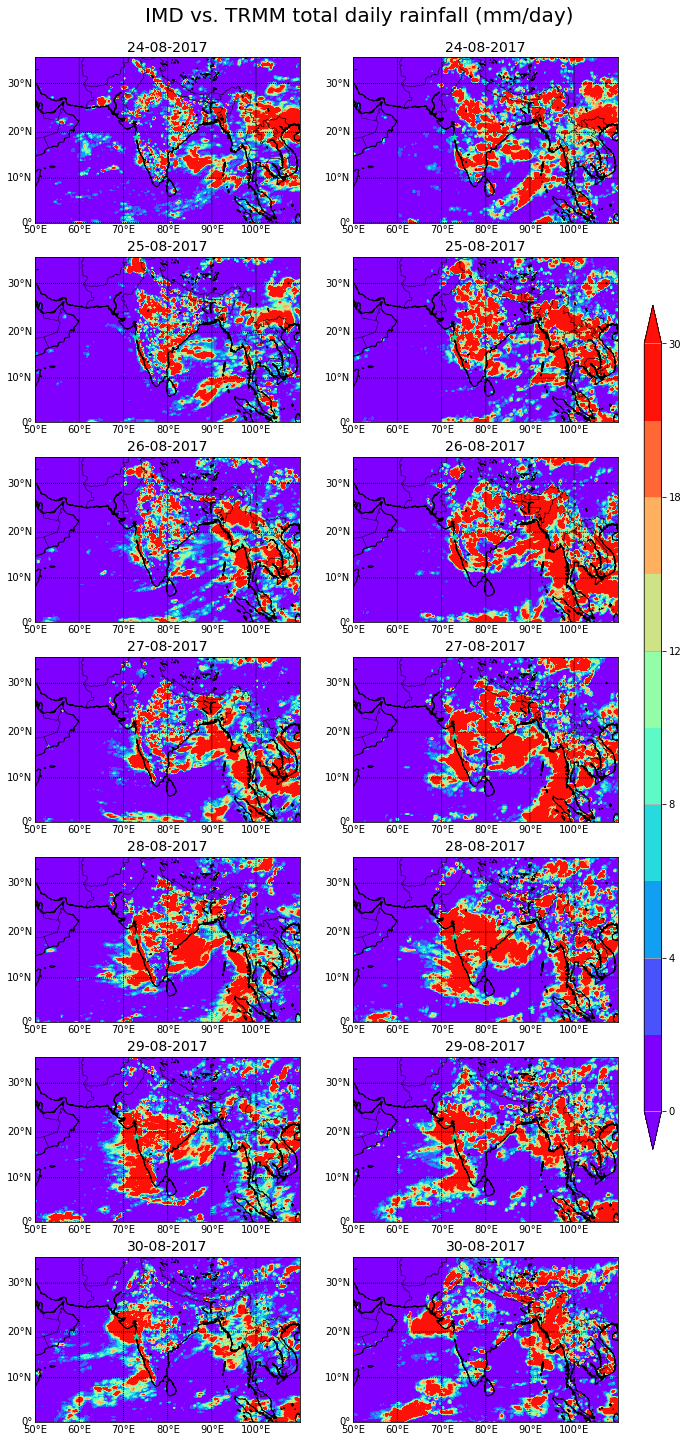

In [12]:
# colormap assumes linearly increasing boundaries
# if non-linear boundaries then normalize the colors to suit the varying gaps
import matplotlib.colors as colors
bounds = np.array([0, 2, 4, 6, 8, 10, 12, 15, 18, 20, 30])
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=250)

panelplot_rows = 7
panelplot_columns = 2
labels=["24-08-2017", "25-08-2017", "26-08-2017", "27-08-2017", "28-08-2017", "29-08-2017", "30-08-2017"]

fig, axes = plt.subplots(figsize=(12,23))
# fig.subplots_adjust(wspace=0, hspace=0)
# axes.set_aspect("auto")

parallels = np.arange(0,35,10) # make latitude lines ever 5 degrees from 30N-50N
meridians = np.arange(50,110,10) # make longitude lines every 5 degrees from 95W to 70W

mumbai_lon, mumbai_lat = 72.8777, 19.0760
xpt, ypt = map(mumbai_lon, mumbai_lat)

lons,lats= np.meshgrid(lon,lat) # for this dataset, longitude is 0 through 360, so you need to subtract 180 to properly display on map
x,y = map(lons,lats)

lons_trmm, lats_trmm = np.meshgrid(lon_trmm,lat_trmm)
x2,y2 = map_trmm(lons_trmm,lats_trmm)

for i in range(0,7):
#     prepare day for one day
    imd_rf_today = imd_rain[i,0,:,:]
    trmm_rf_today = trmm_rain[i*8:i*8+8,:,:]
#     convert 3-hourly average to 3-hourly total
    trmm_rf_today = trmm_rf_today*3
#     sum together all 3-hourly totals to get daily total
    trmm_rf_today = trmm_rf_today.sum(axis=0)    

#   do one row of plots
    plt.subplot(panelplot_rows, panelplot_columns, (2*i)+1)
    plt.title(labels[i], fontsize=14)
    map.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
    map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)
    map.drawcoastlines()
    map.drawstates()
    map.drawcountries()
#     extend='both'
    imd_plot = map.contourf(x,y,imd_rf_today[:,:], bounds, norm=norm,extend='both', cmap=plt.get_cmap('rainbow'))
    map.plot(xpt,ypt,marker = '*',markersize=7, color='#00eda6', zorder=100)
    
    plt.subplot(panelplot_rows, panelplot_columns, (2*i)+2)
    plt.title(labels[i], fontsize=14)
    map_trmm.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
    map_trmm.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)
    map_trmm.drawcoastlines()
    map_trmm.drawstates()
    map_trmm.drawcountries()
    trmm_plot = map_trmm.contourf(x2,y2,trmm_rf_today[:,:], bounds, norm=norm,extend='both', cmap=plt.get_cmap('rainbow'))
    map_trmm.plot(xpt,ypt,marker = '*',markersize=7, color='#00eda6', zorder=100)
    
    
fig.subplots_adjust(top=0.95, right=0.8)
# Add an axes at position rect [left, bottom, width, height] where all quantities are in fractions of figure width and height.
cb_axes = fig.add_axes([0.83, 0.29, 0.02, 0.51])
cb = fig.colorbar(imd_plot, cax=cb_axes)    
fig.suptitle('IMD vs. TRMM total daily rainfall (mm/day)', fontsize=20)
plt.grid(True)
# plt.show()
plt.savefig('spatial_imd_vs_trmm.pdf', bbox_inches='tight')